# *`Assignment_6`*

**Problem Statement 1:** Load the 'Breast_Cancer_Dataset.csv' dataset into a DataFrame and perform the following tasks:
1. Identify the null values and remove the null rows and columns by using the dropna() function
2. Encode the 'diagnosis' column using the LabelEncoder()
3. Considering the 'diagnosis' column as the target, separate the target variable and the feature vectors
4. Split the dataset into the training set and test set in a 70:30 ratio
5. Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also print their accuracies
6. Calculate and plot the confusion matrix

## Import libraries

In [1]:
## Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report, f1_score, roc_auc_score

In [2]:
# Get the data
!wget https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/6_Model_Evaluation_Metrics/Datasets/Breast_Cancer_Dataset.csv

--2024-03-09 14:51:55--  https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/6_Model_Evaluation_Metrics/Datasets/Breast_Cancer_Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 124635 (122K) [text/plain]
Saving to: ‘Breast_Cancer_Dataset.csv’

Breast_Cancer_Datas 100%[===================>] 121.71K  --.-KB/s    in 0.02s   

2024-03-09 14:51:55 (5.91 MB/s) - ‘Breast_Cancer_Dataset.csv’ saved [124635/124635]



In [3]:
# Load the dataset
cancer_data = pd.read_csv('Breast_Cancer_Dataset.csv')
cancer_data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
# Identify the null values and remove the null rows
cancer_data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
cancer_data.duplicated().sum()

0

In [6]:
# Columns by using the dropna() function
cancer_data.drop('Unnamed: 32', axis = 1, inplace = True)
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# Encode the 'diagnosis' column using the LabelEncoder()
label_encode = LabelEncoder()
cancer_data['diagnosis'] = label_encode.fit_transform(cancer_data['diagnosis'])
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
# Considering the 'diagnosis' column as the target, separate the target variable and the feature vectors
X = cancer_data.drop('diagnosis', axis = 1)
y = cancer_data.diagnosis

In [9]:
# Create a list of models
models = [LogisticRegression(max_iter = 1000, solver = 'saga'), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC(), RandomForestClassifier()]

# Define the number of folds
n_splits = 5

# Initialize KFold object
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize an empty dictionary to store accuracies for each fold
fold_accuracies = {}

# Initialize a list to store confusion matrices
confusion_matrices = {}

# Iterate over each fold
for fold, (train_idx, test_idx) in enumerate(kf.split(X)):
  # Split the data into train and test sets
  X_train_kfold, X_test_kfold = X.iloc[train_idx], X.iloc[test_idx]
  y_train_kfold, y_test_kfold = y.iloc[train_idx], y.iloc[test_idx]

  # Use X_train, X_test, y_train, y_test for training and testing your model
  print(f"Fold {fold+1}:")
  print(f"Train set size: {len(train_idx)}")
  print(f"Test set size: {len(test_idx)}\n")

# Fit each model on KFold data
for model in models:
  model.fit(X_train_kfold, y_train_kfold)

  # Predict on the test set
  y_pred = model.predict(X_test_kfold)

  # Calculate accuracy for this fold and append to list
  accuracy = accuracy_score(y_test_kfold, y_pred)
  fold_accuracies[re.sub(r'\([^)]*\)', '', str(model))] = accuracy

  # Calculate confusion matrix for this fold
  confusion_matrices[re.sub(r'\([^)]*\)', '', str(model))] = confusion_matrix(y_test_kfold, y_pred)

Fold 1:
Train set size: 455
Test set size: 114

Fold 2:
Train set size: 455
Test set size: 114

Fold 3:
Train set size: 455
Test set size: 114

Fold 4:
Train set size: 455
Test set size: 114

Fold 5:
Train set size: 456
Test set size: 113



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [10]:
# Print the accuracies
for key, value in fold_accuracies.items():
  print(f"{key}  ->  ACC: {value}\n")

LogisticRegression  ->  ACC: 0.5929203539823009

GaussianNB  ->  ACC: 0.6017699115044248

DecisionTreeClassifier  ->  ACC: 0.9380530973451328

KNeighborsClassifier  ->  ACC: 0.7610619469026548

SVC  ->  ACC: 0.5929203539823009

RandomForestClassifier  ->  ACC: 0.9557522123893806



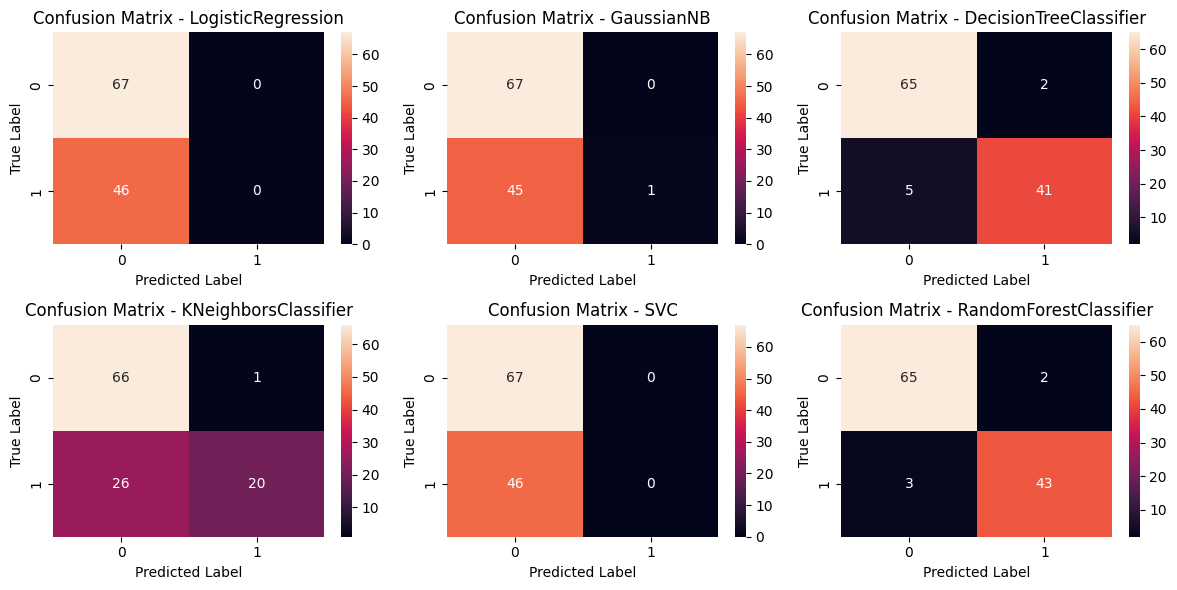

In [145]:
# Plot confusion matrices side by side using subplots
plt.figure(figsize=(12, 6))
for i, (model, cm) in enumerate(confusion_matrices.items()):
  plt.subplot(2, 3, i+1)
  sns.heatmap(cm, annot=True, fmt="d", cmap="rocket", cbar=True)
  plt.title(f"Confusion Matrix - {model}")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")

#plt.subplots_adjust(wspace=0.9, hspace=0.7)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Show all subplots together

**Problem Statement 2:** Load the 'Breast_Cancer_Dataset.csv' dataset into a DataFrame and perform the following tasks:
1. Identify the null values and remove the null rows and columns by using the dropna() function
2. Considering the 'diagnosis' column as the target, encode the 'diagnosis' column using the LabelEncoder()
3. Separate the target variable and the feature vectors
4. Split the dataset into the training set and test set in a 70:30 ratio
5. Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also, print their accuracies
6. Calculate the ROC_AUC score based on the False Positive Rate (FPR) and True Positive Rate (TPR)
7. Plot the ROC Curve using the Matplotlib library
8. Calculate the F1 Score
9. Calculate and Print the Precision, Recall, and F1 score using the classification_report() function
Hint: You can declare the algorithms in a list and iterate through them to build their respective models and calculate their accuracies using a for loop.

In [12]:
# Check the data
cancer_data.shape

(569, 32)

In [13]:
cancer_data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
# Data is already encoded
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
# Split the dataset into the training set and test set in a 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

len(X_train), len(X_test), len(y_train), len(y_test)

(398, 171, 398, 171)

Logistic Regression:
Accuracy: 0.63
ROC AUC: 0.50
F1 Score: 0.00


Classification report for Logistic Regression is:

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       108
           1       1.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.82      0.50      0.39       171
weighted avg       0.77      0.63      0.49       171


Naive Bayes:
Accuracy: 0.64
ROC AUC: 0.51
F1 Score: 0.06


Classification report for Naive Bayes is:

              precision    recall  f1-score   support

           0       0.64      0.99      0.78       108
           1       0.67      0.03      0.06        63

    accuracy                           0.64       171
   macro avg       0.65      0.51      0.42       171
weighted avg       0.65      0.64      0.51       171


Decision Tree:
Accuracy: 0.94
ROC AUC: 0.94
F1 Score: 0.92


Classification report for Decision Tree is:

              prec

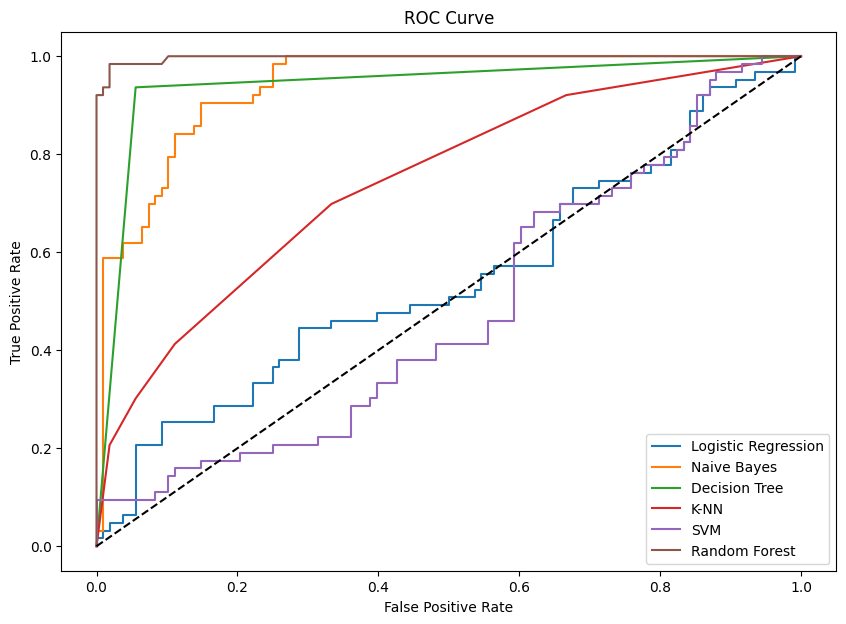

In [16]:
plt.figure(figsize = (10,7))

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-NN": KNeighborsClassifier(),
    "SVM": SVC(probability = True),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Model evaluation
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"ROC AUC: {roc_auc:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Classification report
    print(f"\n\nClassification report for {name} is:\n\n{classification_report(y_test, y_pred, zero_division=1)}\n")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=name)

# Plot ROC Curve
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Problem Statement 3:** Load the ‘voice.csv’ dataset into a DataFrame and perform the following tasks:
1. Considering the ‘label’ column as the target variable, rename the column as ‘Gender_Identified’
2. Using the preprocessing() function, label the target column
3. Separate the target variable and the feature vectors
4. Build a RandomForestClassifier model and find the best parameters using a Grid search
5. Print the best parameters and the best estimator

In [17]:
# Get the data
!wget https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/6_Model_Evaluation_Metrics/Datasets/voice.csv

--2024-03-09 14:51:59--  https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/6_Model_Evaluation_Metrics/Datasets/voice.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1065381 (1.0M) [text/plain]
Saving to: ‘voice.csv’

voice.csv           100%[===================>]   1.02M  --.-KB/s    in 0.05s   

2024-03-09 14:52:00 (19.1 MB/s) - ‘voice.csv’ saved [1065381/1065381]



In [18]:
# Load the data
voice_data = pd.read_csv('voice.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [19]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [20]:
# Considering the ‘label’ column as the target variable, rename the column as ‘Gender_Identified’
voice_data = voice_data.rename(columns={'label': 'Gender_Identified'})
voice_data.iloc[:,-2:].head()

,modindx,Gender_Identified
0,0.000000,male
1,0.052632,male
2,0.046512,male
3,0.247119,male
4,0.208274,male


In [21]:
# Using the preprocessing() function, label the target column
label_encoder = LabelEncoder()
voice_data.iloc[:,-1] = label_encoder.fit_transform(voice_data.iloc[:,-1])
voice_data.head()

<ipython-input-21-2c152969a6b3>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  voice_data.iloc[:,-1] = label_encoder.fit_transform(voice_data.iloc[:,-1])


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,Gender_Identified
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1


In [22]:
# Separate the target variable and the feature vectors
feature_vec = voice_data.iloc[:,:-1]
target = voice_data.iloc[:,-1]

# Create train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(feature_vec,
                                                target,
                                                test_size = 0.3,
                                                random_state = 42)

In [23]:
# Build a RandomForestClassifier model and find the best parameters using a Grid search
params_grid = {"n_estimators" : [ 50, 100, 150, 200],
               "criterion" : ['gini', 'entropy', 'log_loss'],
               "max_features" : ['sqrt', 'auto'],
               "max_depth" : [2, 6, 10, 12, None],
               "max_samples" : [0.25, 0.5, 0.75, 1.0]}

# Lets build grid search
classifier = GridSearchCV(estimator = RandomForestClassifier(bootstrap = True),
                          param_grid = params_grid,
                          cv = 4,
                          n_jobs = -1)

# Fit the grid on data
classifier.fit(Xtrain, ytrain)

# Print the best parameters and the best estimator
print(f"The best parameters are: {classifier.best_params_}\nThe best estimator is: {classifier.best_estimator_}")

The best parameters are: {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'max_samples': 1.0, 'n_estimators': 150}
The best estimator is: RandomForestClassifier(max_depth=12, max_samples=1.0, n_estimators=150)


**Problem Statement 4:** The ‘seeds.csv’ dataset contains the data about the wheat seeds, the ‘Type’ column consisit of three unique values, 1, 2, 3, which are classified based on the charecterstics of seeds entailing in other columns.
Load the ‘seeds.csv’ dataset into a DataFrame and perform the following tasks:
1. Considering the 'Type' column as target, analyze the target column by printing the unique values
2. Separate the feature vectors and the target variable
3. Split the dataset into train and test sets in a 70:30 ratio
4. Build a Decision Tree Classifier and a GaussianNB model and print their accuracy scores
5. For the Decision Tree Classifier and a GaussianNB models boost the accuracy using ADA Boost Classifier and compare the accuracy scores with original models using a bar plot

In [24]:
# Get the data
!wget https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/6_Model_Evaluation_Metrics/Datasets/seeds.csv

--2024-03-09 15:06:01--  https://raw.githubusercontent.com/krutika-shimpi/Edureka_Internship_Assigments_solved/main/6_Model_Evaluation_Metrics/Datasets/seeds.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8925 (8.7K) [text/plain]
Saving to: ‘seeds.csv’

seeds.csv           100%[===================>]   8.72K  --.-KB/s    in 0s      

2024-03-09 15:06:02 (68.8 MB/s) - ‘seeds.csv’ saved [8925/8925]



In [64]:
# Load the data
seed_data = pd.read_csv('seeds.csv')
seed_data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [65]:
# Considering the 'Type' column as target, analyze the target column by printing the unique values
uniq = pd.DataFrame(seed_data['Type'].value_counts())
uniq['Percentage'] = uniq['Type']/len(seed_data)
uniq

,Type,Percentage
2,68,0.341709
1,66,0.331658
3,65,0.326633


In [68]:
# Separate the feature vectors and the target variable
feature_vector = seed_data.iloc[:,:-1]
target_variable = seed_data.iloc[:,-1]

# Split the dataset into train and test sets in a 70:30 ratio
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(feature_vector,
                                                                        target_variable,
                                                                        test_size = 0.30,
                                                                        random_state = 1)

# Build a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_data, y_train_data)
y_pred_dt = dt_classifier.predict(X_test_data)

# Calculate the accuracy
dt_acc = accuracy_score(y_true= y_test_data, y_pred = y_pred_dt)
print(f'Accuracy score of the Decision Tree classifier is: {np.round(dt_acc, 3)}')

# GaussianNB model and print their accuracy scores
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_data, y_train_data)
y_pred_nb = naive_bayes.predict(X_test_data)

# Calculate the accuracy
nb_acc = accuracy_score(y_true= y_test_data, y_pred = y_pred_nb)
print(f'Accuracy score of the Naive Bayes classifier is: {np.round(nb_acc, 3)}')

Accuracy score of the Decision Tree classifier is: 0.883
Accuracy score of the Naive Bayes classifier is: 0.9


In [96]:
# For the Decision Tree Classifier and a GaussianNB models boost the accuracy using ADA Boost Classifier and compare the accuracy scores with original models using a bar plot
# Boosting decision tree classifier
ada_clf_dt = AdaBoostClassifier(estimator = dt_classifier,
                                n_estimators = 100,
                                learning_rate = 0.01)

ada_clf_dt.fit(X_train_data, y_train_data)
y_pred_dt_ada = ada_clf_dt.predict(X_test_data)

# Calculate the boosted accuracy for decision tree
boosted_dt_acc = accuracy_score(y_test_data, y_pred_dt_ada)

# Boosted Naive bayes classifier
ada_clf_nb = AdaBoostClassifier(estimator = naive_bayes,
                                n_estimators = 100,
                                learning_rate = 0.01)

ada_clf_nb.fit(X_train_data, y_train_data)
y_pred_nb_ada = ada_clf_nb.predict(X_test_data)

# Calculate the boosted accuracy for naive bayes
boosted_nb_acc = accuracy_score(y_test_data, y_pred_nb_ada)

# Create a dictionary to store accuracy values for each model
accuracies = {'Decision Tree': np.round(dt_acc, 3),
              'Naive Bayes': np.round(nb_acc, 3),
              'Adaboost (Decision Tree)': np.round(boosted_dt_acc, 3),
              'Adaboost (Naive Bayes)': np.round(boosted_nb_acc, 3)}

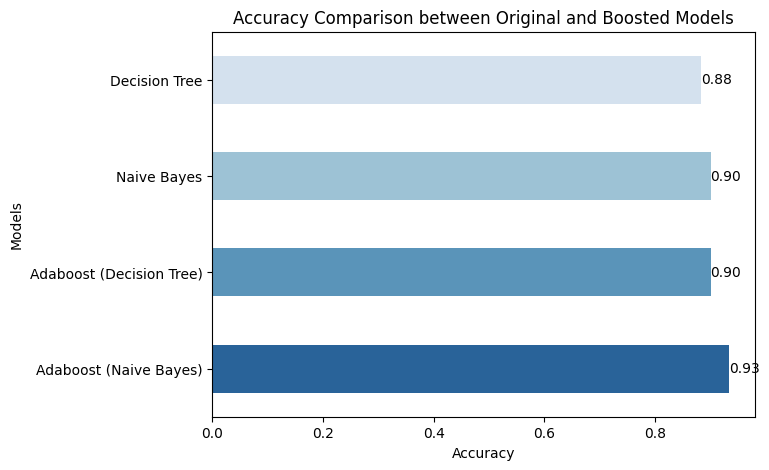

In [146]:
# 4. Plot bar plot
plt.figure(figsize=(7, 5))
sns.barplot(y=list(accuracies.keys()), x=list(accuracies.values()), hue = list(accuracies.keys()), width = 0.5, palette = 'Blues')
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Accuracy Comparison between Original and Boosted Models')

# Add annotations
for index, value in enumerate(accuracies.values()):
    plt.text(value, index, f'{value:.2f}', va='center')

plt.show()